In [179]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
import random

In [180]:
# Question A

In [181]:
# Reading the csv file into a dataframe
dataset_1 = pd.read_csv('dataset_1.csv', index_col=0)

In [182]:
# Printing the dataframe
dataset_1

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
Feature_1,0.290875,0.890803,0.810322,0.094940,0.150149,0.894331,0.275125,0.827974,0.834517,0.825537,...,0.159070,0.086438,0.121265,0.341698,0.291683,0.056298,0.290960,0.202656,0.035955,0.243998
Feature_2,0.810258,0.086271,0.244165,0.821882,0.709219,0.103017,0.909204,0.145578,0.203810,0.242566,...,0.737361,0.353601,0.630064,0.949134,0.949434,0.885854,0.960750,0.962411,0.970746,0.939692
Feature_3,0.865808,0.922013,0.896549,0.956021,0.735553,0.952562,0.889457,0.928676,0.687395,0.947010,...,0.474407,0.693952,0.826595,0.830783,0.079525,0.118060,0.154047,0.626990,0.143361,0.476274
Feature_4,0.862365,0.065577,0.081449,0.985600,0.858728,0.053551,0.050593,0.116895,0.229992,0.049718,...,0.120007,0.827753,0.870148,0.889740,0.044343,0.064320,0.154475,0.076263,0.159277,0.088622
Feature_5,0.966055,0.054152,0.085795,0.997463,0.887684,0.028920,0.059173,0.056659,0.307665,0.011376,...,0.675506,0.921498,0.912418,0.914931,0.078799,0.071866,0.087538,0.199901,0.176992,0.183852
Feature_6,0.983397,0.062524,0.108056,0.998507,0.950558,0.046704,0.309769,0.041906,0.285797,0.096073,...,0.649515,0.904265,0.934002,0.969511,0.056228,0.071918,0.068740,0.138466,0.039358,0.121911
Feature_7,0.859220,0.327923,0.108450,0.914789,0.868725,0.236933,0.081103,0.420160,0.242028,0.234431,...,0.838702,0.923524,0.828973,0.752382,0.396549,0.683677,0.487989,0.736287,0.196116,0.640017
Feature_8,0.771525,0.704931,0.803187,0.236309,0.217483,0.749604,0.806857,0.733636,0.710608,0.859537,...,0.159170,0.215156,0.108606,0.223358,0.899264,0.849367,0.902622,0.877654,0.917164,0.907261
Feature_9,0.993792,0.980666,0.984488,0.998409,0.966818,0.990439,0.989620,0.991279,0.988481,0.977576,...,0.954003,0.948566,0.964837,0.960234,0.083984,0.223674,0.266732,0.676721,0.039353,0.526022
Feature_10,0.442210,0.051163,0.062969,0.701879,0.040176,0.053461,0.117850,0.051543,0.049863,0.045809,...,0.029961,0.025415,0.248211,0.206878,0.752808,0.858049,0.898918,0.569404,0.613008,0.859174


In [183]:
# Transposing the dataframe
dataset_1 = dataset_1.T

In [184]:
# 1
# Creating dataset with 48 samples
sample_dataset = dataset_1.groupby('Class label').sample(n=12)

In [185]:
# Printing the new dataframe
sample_dataset

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
Sample_858,0.201320,0.871041,0.244634,0.042128,0.022438,0.021999,0.687403,0.804242,0.325812,0.713143,0.676581,0.100561,0.457358,0.048369,0.889278,0.112567,0.482494,1.0
Sample_436,0.562829,0.869974,0.480695,0.205246,0.053297,0.059116,0.745502,0.761205,0.581262,0.584733,0.470105,0.136615,0.525378,0.037080,0.675665,0.320798,0.296470,1.0
Sample_409,0.321631,0.712048,0.508350,0.220739,0.215829,0.139452,0.803737,0.717036,0.633524,0.491205,0.780556,0.480835,0.351023,0.045026,0.564484,0.461761,0.008542,1.0
Sample_116,0.363993,0.868057,0.125058,0.118846,0.062322,0.076099,0.658100,0.793334,0.357708,0.671025,0.818311,0.274898,0.442628,0.028555,0.790804,0.731350,0.693175,1.0
Sample_831,0.139739,0.911380,0.046258,0.020759,0.050699,0.041042,0.573716,0.802477,0.258532,0.756698,0.856305,0.069947,0.433562,0.028184,0.914963,0.458862,0.289215,1.0
Sample_258,0.091636,0.849581,0.085429,0.054375,0.033700,0.057654,0.555960,0.813860,0.325188,0.762666,0.758621,0.132073,0.181304,0.044888,0.849744,0.482312,0.010799,1.0
Sample_757,0.153706,0.899288,0.246339,0.033165,0.019668,0.034731,0.339580,0.826164,0.130981,0.821807,0.918619,0.069732,0.092966,0.046677,0.925111,0.291992,0.004880,1.0
Sample_649,0.105082,0.824496,0.138037,0.069245,0.045329,0.044975,0.648774,0.780486,0.248813,0.701421,0.811689,0.239687,0.127794,0.042399,0.805902,0.613921,0.753153,1.0
Sample_93,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,1.0
Sample_870,0.121554,0.928255,0.104177,0.040259,0.010140,0.038339,0.567797,0.744470,0.349395,0.809858,0.733920,0.084182,0.284194,0.037796,0.923266,0.695016,0.408491,1.0


In [186]:
# 1a
# Printing the first five samples and features of the new dataframe
sample_dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
Sample_858,0.201320,0.871041,0.244634,0.042128,0.022438,0.021999,0.687403,0.804242,0.325812,0.713143,0.676581,0.100561,0.457358,0.048369,0.889278,0.112567,0.482494,1.0
Sample_436,0.562829,0.869974,0.480695,0.205246,0.053297,0.059116,0.745502,0.761205,0.581262,0.584733,0.470105,0.136615,0.525378,0.037080,0.675665,0.320798,0.296470,1.0
Sample_409,0.321631,0.712048,0.508350,0.220739,0.215829,0.139452,0.803737,0.717036,0.633524,0.491205,0.780556,0.480835,0.351023,0.045026,0.564484,0.461761,0.008542,1.0
Sample_116,0.363993,0.868057,0.125058,0.118846,0.062322,0.076099,0.658100,0.793334,0.357708,0.671025,0.818311,0.274898,0.442628,0.028555,0.790804,0.731350,0.693175,1.0
Sample_831,0.139739,0.911380,0.046258,0.020759,0.050699,0.041042,0.573716,0.802477,0.258532,0.756698,0.856305,0.069947,0.433562,0.028184,0.914963,0.458862,0.289215,1.0


In [187]:
# Printing the last five samples and features of the new dataframe
sample_dataset.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
Sample_416,0.788127,0.321207,0.939678,0.072484,0.034764,0.041292,0.169730,0.812771,0.994692,0.086877,0.473755,0.981838,0.384297,0.029130,0.007226,0.088082,0.015509,4.0
Sample_109,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,4.0
Sample_203,0.675007,0.122518,0.928261,0.032371,0.015115,0.036106,0.063640,0.746289,0.993962,0.050860,0.039637,0.993938,0.027838,0.026297,0.018818,0.068177,0.006348,4.0
Sample_119,0.799883,0.346306,0.858818,0.233093,0.132560,0.147473,0.293741,0.785540,0.965180,0.027064,0.375136,0.960224,0.283289,0.021232,0.014643,0.263463,0.010202,4.0
Sample_134,0.825537,0.242566,0.947010,0.049718,0.011376,0.096073,0.234431,0.859537,0.977576,0.045809,0.189032,0.980565,0.057078,0.031488,0.019781,0.064767,0.006747,4.0


In [188]:
# 1b
# Getting the maximum value of the dataset
max_value = sample_dataset.to_numpy().max()
max_value

4.0

In [189]:
# Getting the minimum value of the dataset
min_value = sample_dataset.to_numpy().min()
min_value

0.003334658

In [190]:
# 2a
# Carrying out normalisation on the data
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(sample_dataset)
normalised_data

array([[1.86579159e-01, 8.88394035e-01, 2.14207276e-01, 2.21472554e-02,
        1.24553022e-02, 1.95904074e-03, 7.16098612e-01, 8.27215241e-01,
        2.24440428e-01, 7.87579377e-01, 6.89750986e-01, 3.32187905e-02,
        4.56822157e-01, 3.30072438e-02, 9.31295392e-01, 7.34745902e-02,
        5.72322095e-01, 0.00000000e+00],
       [5.95513916e-01, 8.87265676e-01, 4.69107253e-01, 1.91209765e-01,
        4.37108242e-02, 3.98949253e-02, 7.81379426e-01, 7.74527776e-01,
        5.18710863e-01, 6.40752623e-01, 4.66156737e-01, 7.20684023e-02,
        5.29165090e-01, 2.10162397e-02, 7.06639418e-01, 3.20585162e-01,
        3.50129175e-01, 0.00000000e+00],
       [3.22673506e-01, 7.20314292e-01, 4.98969094e-01, 2.07267306e-01,
        2.08330255e-01, 1.22002275e-01, 8.46813224e-01, 7.20456399e-01,
        5.78914745e-01, 5.33809455e-01, 8.02346102e-01, 4.42971470e-01,
        3.43728178e-01, 2.94562507e-02, 5.89710992e-01, 4.87866549e-01,
        6.22010393e-03, 0.00000000e+00],
       [3.705

In [191]:
# Putting the normalised data into a dataframe
scaled_dataset = pd.DataFrame(normalised_data, columns=sample_dataset.columns)
scaled_dataset

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
0,0.186579,0.888394,0.214207,0.022147,0.012455,0.001959,0.716099,0.827215,0.224440,0.787579,0.689751,0.033219,0.456822,0.033007,0.931295,0.073475,0.572322,0.000000
1,0.595514,0.887266,0.469107,0.191210,0.043711,0.039895,0.781379,0.774528,0.518711,0.640753,0.466157,0.072068,0.529165,0.021016,0.706639,0.320585,0.350129,0.000000
2,0.322674,0.720314,0.498969,0.207267,0.208330,0.122002,0.846813,0.720456,0.578915,0.533809,0.802346,0.442971,0.343728,0.029456,0.589711,0.487867,0.006220,0.000000
3,0.370592,0.885239,0.085089,0.101661,0.052851,0.057252,0.683174,0.813861,0.261183,0.739420,0.843231,0.221070,0.441156,0.011960,0.827730,0.807791,0.823966,0.000000
4,0.116919,0.931038,0.000000,0.000000,0.041079,0.021422,0.588358,0.825054,0.146936,0.837382,0.884375,0.000232,0.431513,0.011566,0.958308,0.484427,0.341464,0.000000
5,0.062505,0.865708,0.042296,0.034841,0.023862,0.038401,0.568407,0.838990,0.223721,0.844206,0.778592,0.067174,0.163221,0.029310,0.889718,0.512255,0.008916,0.000000
6,0.132719,0.918254,0.216048,0.012858,0.009650,0.014972,0.325280,0.854052,0.000000,0.911830,0.951855,0.000000,0.069268,0.031210,0.968981,0.286400,0.001846,0.000000
7,0.077715,0.839188,0.099103,0.050253,0.035640,0.025442,0.672695,0.798132,0.135739,0.774177,0.836060,0.183130,0.106310,0.026666,0.843609,0.668436,0.895605,0.000000
8,0.287978,0.983229,0.116391,0.138589,0.078392,0.049731,0.492034,0.947652,0.156382,1.000000,0.787859,0.041084,0.546205,0.031991,1.000000,0.583858,0.721829,0.000000
9,0.096348,0.948877,0.062541,0.020211,0.000000,0.018659,0.581707,0.754041,0.251607,0.898167,0.751844,0.015570,0.272651,0.021777,0.967040,0.764673,0.483930,0.000000


In [192]:
# 2b
# This analysis was necessary to prepare the data for the PCA technique.
# Pre-processing transforms the data into a format that is easier to process
# in data mining or other data science techniques such as PCA.

In [193]:
# 3a
# Finding out how many PCs are representing the most variances
pca = PCA().fit(scaled_dataset)
pca_components_df = pca.explained_variance_ratio_.cumsum() > 0.90
number_of_components = 17 - pca_components_df.sum()
number_of_components

3

In [194]:
# 3b and 3c
# Only 3 PCS are showing the most variance

In [195]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(normalised_data)
principal_dataset = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [196]:
principal_dataset

,principal component 1,principal component 2,principal component 3
0,1.576081,-0.485435,-0.100943
1,1.085208,-0.298805,-0.207896
2,0.831887,0.077152,-0.127785
3,1.575563,-0.152590,-0.167600
4,1.736351,-0.329761,-0.047445
5,1.545143,-0.283545,-0.207037
6,1.613051,-0.473579,-0.144078
7,1.700393,-0.195589,-0.313799
8,1.779657,-0.357996,-0.039663
9,1.739088,-0.228517,-0.213317


array([[<AxesSubplot:title={'center':'principal component 1'}>,
        <AxesSubplot:title={'center':'principal component 2'}>],
       [<AxesSubplot:title={'center':'principal component 3'}>,
        <AxesSubplot:>]], dtype=object)

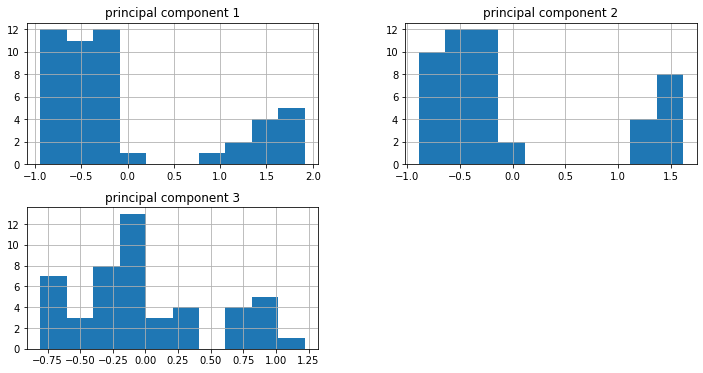

In [197]:
# 3d
# Plotting the Histogram for most significant PCs
principal_dataset.hist()

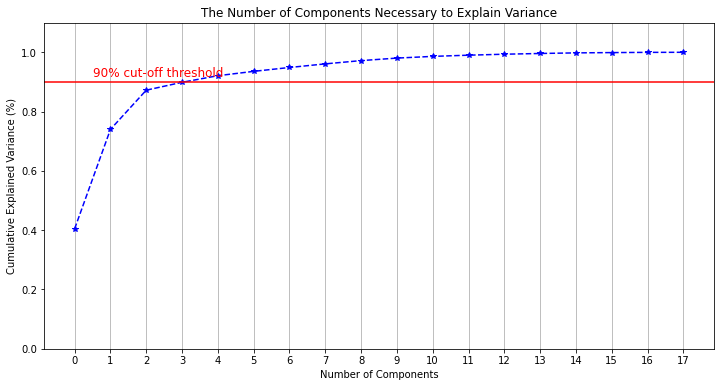

In [198]:
# 4
# Plotting the Cumulative Explained Variances vs Number of Components
pca = PCA().fit(scaled_dataset)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='*', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1))
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('The Number of Components Necessary to Explain Variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.92, '90% cut-off threshold', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

In [199]:
# 5
# By applying PCA to the dataset, it reduces the amount of data to 
# process and can make it easier to see patterns in the data, through
# use of graphs such as the graph above or a histogram. A dimensionality
# reduction algorithm would help eliminate a significant number of
# dimensions from the dataset without losing too much jnformation.

In [200]:
# Question B

In [201]:
# Reading the csv file into a dataframe
dataset_1_classes = dataset_1
dataset_1_classes = dataset_1_classes.T

In [202]:
dataset_1_no_class = dataset_1_classes.drop(labels='Class label',)
dataset_1_no_class   

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
Feature_1,0.290875,0.890803,0.810322,0.094940,0.150149,0.894331,0.275125,0.827974,0.834517,0.825537,...,0.159070,0.086438,0.121265,0.341698,0.291683,0.056298,0.290960,0.202656,0.035955,0.243998
Feature_2,0.810258,0.086271,0.244165,0.821882,0.709219,0.103017,0.909204,0.145578,0.203810,0.242566,...,0.737361,0.353601,0.630064,0.949134,0.949434,0.885854,0.960750,0.962411,0.970746,0.939692
Feature_3,0.865808,0.922013,0.896549,0.956021,0.735553,0.952562,0.889457,0.928676,0.687395,0.947010,...,0.474407,0.693952,0.826595,0.830783,0.079525,0.118060,0.154047,0.626990,0.143361,0.476274
Feature_4,0.862365,0.065577,0.081449,0.985600,0.858728,0.053551,0.050593,0.116895,0.229992,0.049718,...,0.120007,0.827753,0.870148,0.889740,0.044343,0.064320,0.154475,0.076263,0.159277,0.088622
Feature_5,0.966055,0.054152,0.085795,0.997463,0.887684,0.028920,0.059173,0.056659,0.307665,0.011376,...,0.675506,0.921498,0.912418,0.914931,0.078799,0.071866,0.087538,0.199901,0.176992,0.183852
Feature_6,0.983397,0.062524,0.108056,0.998507,0.950558,0.046704,0.309769,0.041906,0.285797,0.096073,...,0.649515,0.904265,0.934002,0.969511,0.056228,0.071918,0.068740,0.138466,0.039358,0.121911
Feature_7,0.859220,0.327923,0.108450,0.914789,0.868725,0.236933,0.081103,0.420160,0.242028,0.234431,...,0.838702,0.923524,0.828973,0.752382,0.396549,0.683677,0.487989,0.736287,0.196116,0.640017
Feature_8,0.771525,0.704931,0.803187,0.236309,0.217483,0.749604,0.806857,0.733636,0.710608,0.859537,...,0.159170,0.215156,0.108606,0.223358,0.899264,0.849367,0.902622,0.877654,0.917164,0.907261
Feature_9,0.993792,0.980666,0.984488,0.998409,0.966818,0.990439,0.989620,0.991279,0.988481,0.977576,...,0.954003,0.948566,0.964837,0.960234,0.083984,0.223674,0.266732,0.676721,0.039353,0.526022
Feature_10,0.442210,0.051163,0.062969,0.701879,0.040176,0.053461,0.117850,0.051543,0.049863,0.045809,...,0.029961,0.025415,0.248211,0.206878,0.752808,0.858049,0.898918,0.569404,0.613008,0.859174


In [203]:
# 1a
# Creating an NMF instance
model = NMF(n_components=4, init='random', random_state=0) 
W = model.fit_transform(dataset_1_no_class)
H = model.components_

/Users/wesleyakinsehinde/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [204]:
# 1b and 1c 
# 4 is the intial rank value because thats the number of components that
# represent the dimensions.

In [205]:
W.shape

(17, 4)

In [206]:
H.shape

(4, 220)

In [207]:
# 2
components_dataset = pd.DataFrame(H, columns=dataset_1_no_class.columns)
components_dataset

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
0,0.045055,0.000000,0.069194,0.000000,0.069232,0.012926,0.850784,0.009631,0.083941,0.067247,...,0.132287,0.019519,0.021134,0.128109,0.000000,0.087110,0.057877,0.212296,0.138864,0.000000
1,0.329844,0.877304,0.828712,0.224752,0.162027,0.898278,0.178841,0.851231,0.709532,0.850071,...,0.150798,0.169115,0.158126,0.170819,0.086322,0.000000,0.071766,0.231678,0.000000,0.193355
2,0.982856,0.088083,0.064745,1.102877,1.063529,0.051431,0.097048,0.118589,0.223331,0.054780,...,0.681553,1.074027,1.101489,1.037744,0.006812,0.118190,0.027571,0.203583,0.000000,0.150677
3,0.363941,0.025730,0.044796,0.227260,0.077436,0.023631,0.000000,0.061953,0.000000,0.089172,...,0.104779,0.037406,0.143939,0.176387,1.295125,1.366543,1.453279,1.085017,1.287601,1.374392


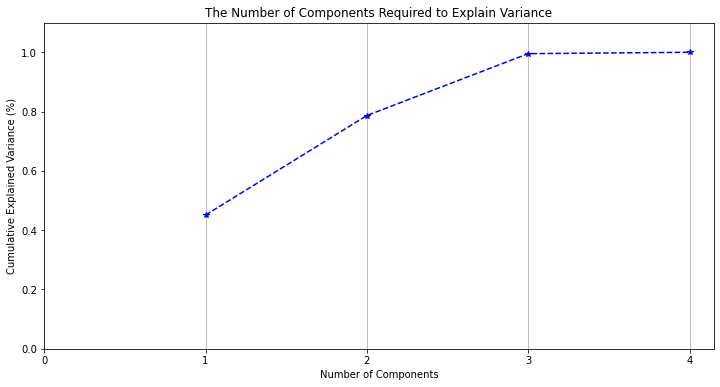

In [208]:
# 3a and 3b
# Plotting the Cumulative Explained Variances vs Number of Components
pca = PCA().fit(components_dataset.T)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='*', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1))
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('The Number of Components Required to Explain Variance')

ax.grid(axis='x')
plt.show()

In [209]:
pca = PCA(n_components= 3)

# Naming columns in the dataframe using a loop
columns = ['PCA %i' % i for i in range(3)]
pca_score = pca.fit_transform(components_dataset)
# Creating the PCA dataframe
X_scaled_display = pd.DataFrame(pca.fit_transform(components_dataset.T),columns=columns)
X_scaled_display

,PCA 0,PCA 1,PCA 2
0,0.564073,0.239424,-0.157196
1,-0.322609,-0.313190,-0.472536
2,-0.349781,-0.289815,-0.390306
3,0.740395,0.172738,-0.117718
4,0.737406,0.050081,-0.009011
...,...,...,...
215,-0.354714,1.228513,-0.027526
216,-0.468659,1.278635,-0.101697
217,-0.308028,0.863264,-0.035068
218,-0.457692,1.143811,0.023330


In [210]:
# 4a 
# 3 PCs were selected

In [211]:
dataset_1_classes = dataset_1_classes.T

In [212]:
# Labeling the clusters with 1, 2, 3 and 4
dataset_1_classes['Class label'] = dataset_1_classes['Class label'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4'})                                                                                                                
dataset_1_classes

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
Sample_108,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,0.899341,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,2
Sample_109,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,4
Sample_110,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,0.135716,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,4
Sample_112,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,0.453133,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,2
Sample_113,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,0.892199,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_359,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,0.907254,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,1
Sample_93,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,1
Sample_30009,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,0.874040,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,1
Sample_30131,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,0.976368,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,1


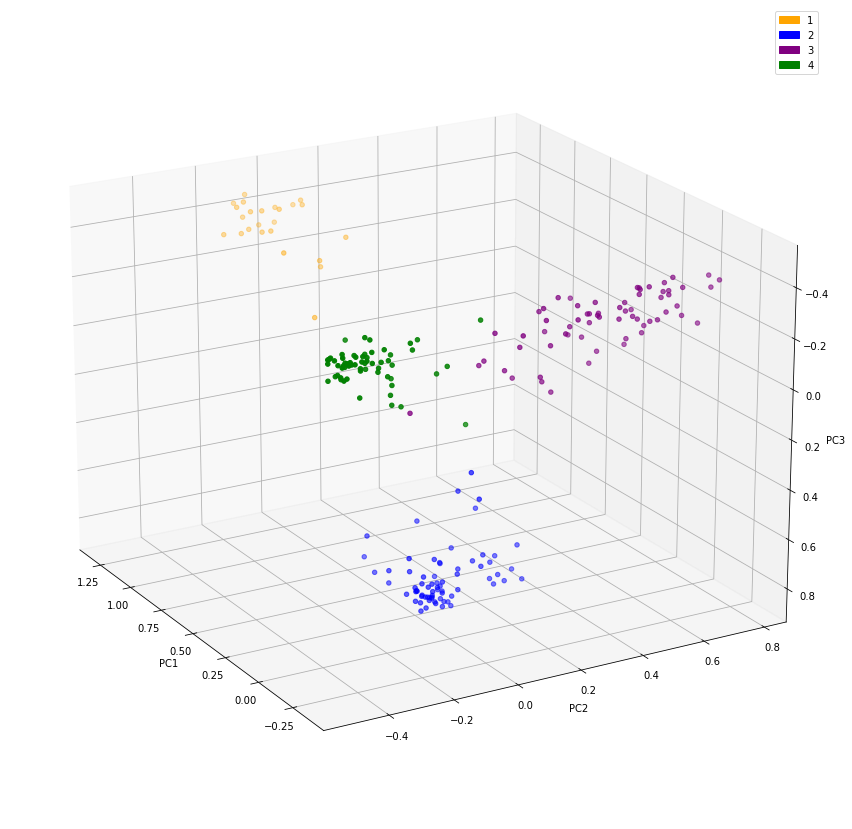

In [213]:
# 5
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

# Defining the colours
colour_map = {'1': 'orange', '2': 'blue', '3':'purple', '4':'green'}

# The Data for 3D scattered points
zdata = X_scaled_display['PCA 0']
xdata = X_scaled_display['PCA 1']
ydata = X_scaled_display['PCA 2']

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(-160, 30)

ax.scatter3D(xdata, ydata, zdata, c=dataset_1_classes['Class label'].map(colour_map))

c1 = mpatches.Patch(color='orange', label='1')
c2 = mpatches.Patch(color='blue', label='2')
c3 = mpatches.Patch(color='purple', label='3')
c4 = mpatches.Patch(color='green', label='4')

plt.legend(handles=[c1, c2, c3, c4])

In [214]:
# 6a
# Using 3 components instead of 4
model = NMF(n_components=3, init='random', random_state=0) 
W = model.fit_transform(dataset_1_no_class)
H = model.components_

In [215]:
W.shape

(17, 3)

In [216]:
H.shape

(3, 220)

In [217]:
components_dataset = pd.DataFrame(H, columns=dataset_1_no_class.columns)
components_dataset

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
0,0.261531,0.000000,0.000000,0.126794,0.112511,0.000000,0.576425,0.000000,0.000000,0.000000,...,0.165745,0.045415,0.118457,0.219901,0.851934,0.969797,0.991541,0.836954,0.985542,0.856985
1,0.156331,0.719142,0.729526,0.045505,0.034455,0.750713,0.616301,0.701094,0.620788,0.746499,...,0.106296,0.016542,0.001374,0.073942,0.000000,0.000000,0.013715,0.233542,0.000000,0.060254
2,0.974802,0.082374,0.073930,1.089054,1.037251,0.047116,0.068793,0.122137,0.221774,0.074771,...,0.665543,1.048015,1.076801,1.012124,0.055467,0.136048,0.079158,0.236832,0.015945,0.219166


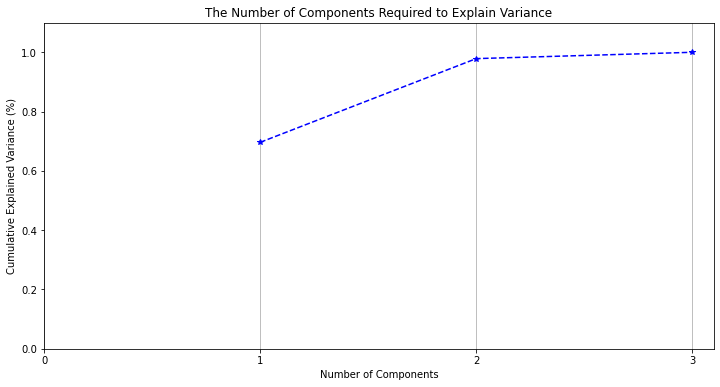

In [218]:
pca = PCA().fit(components_dataset.T)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='*', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 4, step=1))
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('The Number of Components Required to Explain Variance')

ax.grid(axis='x')
plt.show()

In [219]:
pca = PCA(n_components= 3)

# Naming columns in the dataframe using a loop
columns = ['PCA %i' % i for i in range(3)]
pca_score = pca.fit_transform(components_dataset)
# Creating the PCA dataframe
X_scaled_display = pd.DataFrame(pca.fit_transform(components_dataset.T),columns=columns)
X_scaled_display

,PCA 0,PCA 1,PCA 2
0,0.627597,0.056058,-0.121683
1,-0.357663,-0.365016,0.061464
2,-0.369958,-0.369343,0.058427
3,0.804968,-0.016662,-0.039576
4,0.769223,-0.018839,0.001983
...,...,...,...
215,-0.141401,0.823361,0.100751
216,-0.200573,0.840680,0.110558
217,-0.146088,0.584274,-0.057874
218,-0.246255,0.848035,0.156154


In [220]:
dataset_1['Class label'] = dataset_1['Class label'].map({1.0:'1',2.0:'2',3.0:'3',4.0:'4'})                                                                                                                
dataset_1

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Class label
Sample_108,0.290875,0.810258,0.865808,0.862365,0.966055,0.983397,0.859220,0.771525,0.993792,0.442210,0.899341,0.993989,0.085723,0.044409,0.009247,0.728547,0.009350,2
Sample_109,0.890803,0.086271,0.922013,0.065577,0.054152,0.062524,0.327923,0.704931,0.980666,0.051163,0.063914,0.991499,0.055246,0.026149,0.016715,0.086666,0.007753,4
Sample_110,0.810322,0.244165,0.896549,0.081449,0.085795,0.108056,0.108450,0.803187,0.984488,0.062969,0.135716,0.988808,0.046480,0.028105,0.020642,0.057173,0.025406,4
Sample_112,0.094940,0.821882,0.956021,0.985600,0.997463,0.998507,0.914789,0.236309,0.998409,0.701879,0.453133,0.997791,0.105029,0.030050,0.004756,0.871429,0.011524,2
Sample_113,0.150149,0.709219,0.735553,0.858728,0.887684,0.950558,0.868725,0.217483,0.966818,0.040176,0.892199,0.984008,0.061793,0.028857,0.024785,0.740817,0.009471,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_359,0.056298,0.885854,0.118060,0.064320,0.071866,0.071918,0.683677,0.849367,0.223674,0.858049,0.907254,0.198160,0.594047,0.059437,0.936617,0.751912,0.024637,1
Sample_93,0.290960,0.960750,0.154047,0.154475,0.087538,0.068740,0.487989,0.902622,0.266732,0.898918,0.767178,0.107860,0.541399,0.047412,0.954606,0.542649,0.607664,1
Sample_30009,0.202656,0.962411,0.626990,0.076263,0.199901,0.138466,0.736287,0.877654,0.676721,0.569404,0.874040,0.647621,0.635987,0.066916,0.845085,0.495015,0.344584,1
Sample_30131,0.035955,0.970746,0.143361,0.159277,0.176992,0.039358,0.196116,0.917164,0.039353,0.613008,0.976368,0.095003,0.531056,0.028969,0.936936,0.349951,0.509395,1


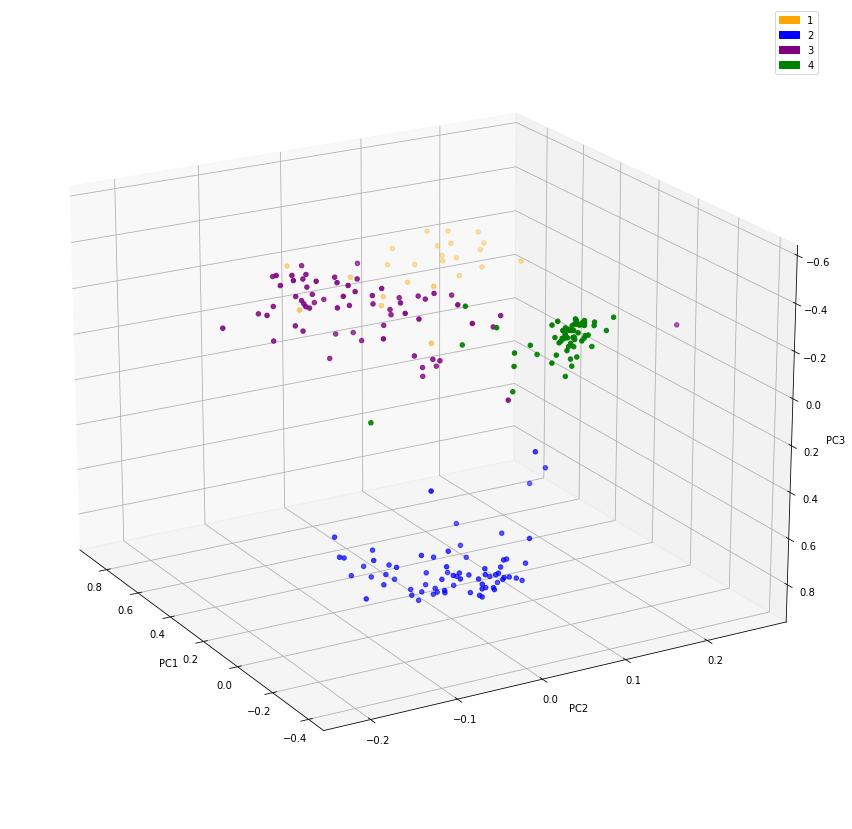

In [221]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

# Defining the colours
colour_map = {'1': 'orange', '2': 'blue', '3':'purple', '4':'green'}

# The Data for 3D scattered points
zdata = X_scaled_display['PCA 0']
xdata = X_scaled_display['PCA 1']
ydata = X_scaled_display['PCA 2']

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(-160, 30)

ax.scatter3D(xdata, ydata, zdata, c=dataset_1['Class label'].map(colour_map))

c1 = mpatches.Patch(color='orange', label='1')
c2 = mpatches.Patch(color='blue', label='2')
c3 = mpatches.Patch(color='purple', label='3')
c4 = mpatches.Patch(color='green', label='4')

plt.legend(handles=[c1, c2, c3, c4])

In [222]:
# I think using 4 components is the best ratio as even using 3 can make the data lose some meaning, the data on the
# first 3D plot shows a pattern more visibly than the one with 3 components.

In [223]:
# Question C

In [224]:
# Randomly choosing 5 features across all samples as NAN
dataset_2 = dataset_1_no_class.mask(np.random.random(dataset_1_no_class.shape) < .05)
dataset_2

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
Feature_1,0.290875,0.890803,0.810322,0.094940,0.150149,0.894331,0.275125,0.827974,0.834517,0.825537,...,0.159070,0.086438,0.121265,0.341698,0.291683,0.056298,0.290960,0.202656,0.035955,0.243998
Feature_2,NaN,0.086271,0.244165,0.821882,0.709219,0.103017,0.909204,0.145578,0.203810,0.242566,...,0.737361,0.353601,0.630064,0.949134,0.949434,0.885854,0.960750,0.962411,0.970746,0.939692
Feature_3,0.865808,0.922013,0.896549,NaN,0.735553,0.952562,0.889457,0.928676,0.687395,0.947010,...,0.474407,0.693952,0.826595,0.830783,0.079525,NaN,0.154047,0.626990,0.143361,0.476274
Feature_4,0.862365,0.065577,0.081449,0.985600,0.858728,0.053551,0.050593,0.116895,0.229992,0.049718,...,0.120007,0.827753,0.870148,0.889740,0.044343,0.064320,0.154475,0.076263,0.159277,0.088622
Feature_5,0.966055,0.054152,0.085795,0.997463,0.887684,0.028920,0.059173,0.056659,0.307665,0.011376,...,0.675506,0.921498,0.912418,0.914931,0.078799,0.071866,0.087538,0.199901,0.176992,0.183852
Feature_6,0.983397,0.062524,0.108056,0.998507,0.950558,0.046704,0.309769,0.041906,0.285797,0.096073,...,0.649515,0.904265,0.934002,0.969511,0.056228,0.071918,0.068740,0.138466,0.039358,0.121911
Feature_7,0.859220,0.327923,0.108450,0.914789,0.868725,0.236933,0.081103,0.420160,0.242028,0.234431,...,0.838702,0.923524,0.828973,0.752382,0.396549,0.683677,0.487989,0.736287,0.196116,0.640017
Feature_8,0.771525,0.704931,0.803187,0.236309,0.217483,0.749604,0.806857,NaN,0.710608,0.859537,...,0.159170,0.215156,NaN,0.223358,0.899264,0.849367,0.902622,0.877654,0.917164,0.907261
Feature_9,0.993792,0.980666,0.984488,0.998409,0.966818,0.990439,0.989620,0.991279,0.988481,0.977576,...,0.954003,0.948566,0.964837,NaN,0.083984,0.223674,0.266732,0.676721,0.039353,0.526022
Feature_10,0.442210,0.051163,0.062969,0.701879,NaN,NaN,0.117850,0.051543,0.049863,0.045809,...,0.029961,0.025415,0.248211,0.206878,0.752808,0.858049,0.898918,0.569404,0.613008,0.859174


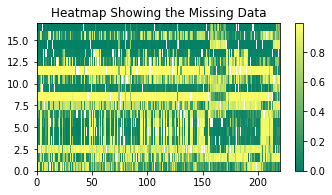

In [225]:
# 2a and 2b
# Plotting the heatmap
plt.subplot(2,2,3)
plt.pcolormesh(dataset_2, cmap = 'summer')
plt.title('Heatmap Showing the Missing Data')
plt.colorbar()

In [226]:
# 3a
# Checking if there is any missing data
dataset_2.isnull()

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
Feature_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
Feature_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Feature_8,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
Feature_9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
Feature_10,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [227]:
# 3b
# Applying Univariate imputation to address missingness of the data
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(dataset_2)
imputed_dataset = imp_mean.transform(dataset_2)
imputed_dataset_2 = pd.DataFrame(imputed_dataset, columns=dataset_2.columns)
imputed_dataset_2

,Sample_108,Sample_109,Sample_110,Sample_112,Sample_113,Sample_125,Sample_127,Sample_130,Sample_132,Sample_134,...,Sample_487,Sample_537,Sample_59,Sample_619,Sample_135,Sample_359,Sample_93,Sample_30009,Sample_30131,Sample_350080
0,0.290875,0.890803,0.810322,0.094940,0.150149,0.894331,0.275125,0.827974,0.834517,0.825537,...,0.159070,0.086438,0.121265,0.341698,0.291683,0.056298,0.290960,0.202656,0.035955,0.243998
1,0.612866,0.086271,0.244165,0.821882,0.709219,0.103017,0.909204,0.145578,0.203810,0.242566,...,0.737361,0.353601,0.630064,0.949134,0.949434,0.885854,0.960750,0.962411,0.970746,0.939692
2,0.865808,0.922013,0.896549,0.576468,0.735553,0.952562,0.889457,0.928676,0.687395,0.947010,...,0.474407,0.693952,0.826595,0.830783,0.079525,0.452318,0.154047,0.626990,0.143361,0.476274
3,0.862365,0.065577,0.081449,0.985600,0.858728,0.053551,0.050593,0.116895,0.229992,0.049718,...,0.120007,0.827753,0.870148,0.889740,0.044343,0.064320,0.154475,0.076263,0.159277,0.088622
4,0.966055,0.054152,0.085795,0.997463,0.887684,0.028920,0.059173,0.056659,0.307665,0.011376,...,0.675506,0.921498,0.912418,0.914931,0.078799,0.071866,0.087538,0.199901,0.176992,0.183852
5,0.983397,0.062524,0.108056,0.998507,0.950558,0.046704,0.309769,0.041906,0.285797,0.096073,...,0.649515,0.904265,0.934002,0.969511,0.056228,0.071918,0.068740,0.138466,0.039358,0.121911
6,0.859220,0.327923,0.108450,0.914789,0.868725,0.236933,0.081103,0.420160,0.242028,0.234431,...,0.838702,0.923524,0.828973,0.752382,0.396549,0.683677,0.487989,0.736287,0.196116,0.640017
7,0.771525,0.704931,0.803187,0.236309,0.217483,0.749604,0.806857,0.306282,0.710608,0.859537,...,0.159170,0.215156,0.583440,0.223358,0.899264,0.849367,0.902622,0.877654,0.917164,0.907261
8,0.993792,0.980666,0.984488,0.998409,0.966818,0.990439,0.989620,0.991279,0.988481,0.977576,...,0.954003,0.948566,0.964837,0.597745,0.083984,0.223674,0.266732,0.676721,0.039353,0.526022
9,0.442210,0.051163,0.062969,0.701879,0.567928,0.350498,0.117850,0.051543,0.049863,0.045809,...,0.029961,0.025415,0.248211,0.206878,0.752808,0.858049,0.898918,0.569404,0.613008,0.859174


In [228]:
# 4
y = 0.05
m = 20
avg_imputation = 1/(1+(y/m))
avg_imputation

0.9975062344139651

In [229]:
# Question D

In [230]:
# 1a
# Reading the csv file into the dataframe 
dataset_3 = pd.read_csv('dataset_3.csv', index_col=0)
dataset_3 

,TCGA.02.0047.GBM.C4,TCGA.02.0055.GBM.C4,TCGA.02.2483.GBM.C4,TCGA.02.2485.GBM.C4,TCGA.02.2486.GBM.C4,TCGA.04.1348.OV.C2,TCGA.04.1357.OV.C2,TCGA.04.1362.OV.C4,TCGA.04.1364.OV.C1,TCGA.04.1365.OV.C2,...,TCGA.ZP.A9D2.LIHC.C2,TCGA.ZP.A9D4.LIHC.C4,TCGA.ZQ.A9CR.STAD.C1,TCGA.ZR.A9CJ.ESCA.C1,TCGA.ZS.A9CD.LIHC.C3,TCGA.ZS.A9CE.LIHC.C4,TCGA.ZS.A9CF.LIHC.C4,TCGA.ZS.A9CG.LIHC.C3,TCGA.ZU.A8S4.CHOL.C1,TCGA.ZX.AA5X.CESC.C2
ACTL6A_S5,745.5670,1154.3100,1498.6800,1320.0000,1404.2700,3504.629533,1293.399416,2882.595819,2020.798919,2793.364138,...,986.5360,610.3800,1491.324446,1252.608630,386.1760,472.6480,831.1510,333.1620,1176.6200,1021.6600
ADAM9_S2,4287.7800,9475.5400,2307.1200,2685.7100,2843.9000,1107.601536,1064.576057,2617.298339,1093.064945,1086.625845,...,3511.2800,368.2650,5451.959018,7047.163688,416.2280,178.8840,504.4800,920.6510,7189.3300,3178.6500
ADAMTS1_S5,241.5560,6098.9500,433.9840,911.9050,321.9510,1956.185336,1916.188921,1367.380382,604.273517,3263.023906,...,489.8110,626.7850,3690.093898,1634.302502,2046.5800,135.6670,1062.7200,467.5240,512.0280,608.6620
ADCY7_S3,1067.6400,556.1320,497.3090,316.6670,637.8050,561.609041,886.611634,473.008085,348.507899,359.943652,...,264.9200,113.7040,561.088712,1464.455684,100.6760,35.5580,126.1200,209.7690,933.3170,1081.2100
AIMP2_S5,406.7360,537.0880,752.1480,785.5520,792.9630,1838.741423,805.563620,363.847507,1133.047832,1080.598945,...,721.0260,744.9470,738.072372,516.796893,980.8410,1434.8000,492.3570,730.6870,479.5910,352.2810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNT2B_S2,43.0253,44.8493,10.1319,18.5714,7.3171,6.826312,8.818140,35.562682,73.287577,3.270352,...,8.7336,5.6569,81.463390,15.900666,5.2592,1.6411,4.1351,3.4276,5.9828,45.6303
WNT8B_S2,0.0000,0.0000,0.8443,0.9524,0.6098,13.784637,1.288687,8.450941,20.329321,0.974721,...,0.7278,0.5657,-0.045485,1.989654,0.0000,10.9409,0.6892,4.7986,0.4986,0.7734
WSB2_S5,4291.4700,2494.1800,4128.7600,3609.5200,2747.5600,1230.028133,883.046894,1244.651806,1117.560376,1630.778011,...,2286.3900,1176.0700,1133.665431,2397.344546,1341.8500,1684.3500,982.7700,1372.4100,4231.8300,1871.6200
ZWILCH_S5,260.2110,467.5600,682.2420,440.3860,166.6890,900.194079,191.283160,410.995532,885.856405,628.274172,...,393.3480,216.0090,915.681368,484.566825,112.1940,133.3210,383.7910,97.3436,375.9790,548.1980


In [231]:
# Creating dataset with 174 samples from each group
dataset_C1 = dataset_3.filter(like= 'C1').sample(n=174)
dataset_C2 = dataset_3.filter(like= 'C2').sample(n=174)
dataset_C3 = dataset_3.filter(like= 'C3').sample(n=174)
dataset_C4 = dataset_3.filter(like= 'C4').sample(n=174)
sample_dataset = pd.concat([dataset_C1, dataset_C2, dataset_C3, dataset_C4])
sample_dataset

,TCGA.04.1364.OV.C1,TCGA.05.4390.LUAD.C1,TCGA.05.4420.LUAD.C1,TCGA.05.5429.LUAD.C1,TCGA.06.2569.GBM.C1,TCGA.09.0364.OV.C1,TCGA.09.0369.OV.C1,TCGA.09.1674.OV.C1,TCGA.09.2048.OV.C1,TCGA.09.2054.OV.C1,...,TCGA.ZF.AA4X.BLCA.C4,TCGA.ZF.AA54.BLCA.C4,TCGA.ZH.A8Y4.CHOL.C4,TCGA.ZN.A9VS.MESO.C4,TCGA.ZN.A9VV.MESO.C4,TCGA.ZP.A9CV.LIHC.C4,TCGA.ZP.A9CY.LIHC.C4,TCGA.ZP.A9D4.LIHC.C4,TCGA.ZS.A9CE.LIHC.C4,TCGA.ZS.A9CF.LIHC.C4
CXCL10_S1,32.608439,176.273,75.9926,146.945,16.5192,5.909254,112.426286,105.974580,141.132761,183.233795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADAMTS1_S5,604.273517,546.703,428.3460,272.235,548.4370,4823.217017,816.382256,678.295100,1563.748558,2238.673691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASP1_S3,11.091970,119.432,144.8860,437.742,55.6932,8.501278,85.971059,13.433838,41.879473,85.084655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WDR77_S5,1983.529843,1090.210,1219.8800,1143.850,1036.4600,2468.310782,1155.539571,1335.130915,1306.289957,1611.654173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CKLF_S5,484.624308,417.691,569.5500,2341.070,897.2270,371.452437,949.274485,255.424662,670.003153,271.530953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLCG2_S3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.6408,421.5590,216.085,353.958,1261.3000,856.5160,665.3630,603.026,1718.8200,912.4740
MMP3_S2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.4102,14.6761,0.000,178.344,31.3316,0.0000,0.7093,0.000,0.0000,0.0000
NCLN_S5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1734.4700,5628.5400,2787.790,1168.330,1961.8400,2251.8800,2070.5700,2462.450,4234.1400,1458.9900
FAM167A_S5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0020,44.0283,380.329,1506.370,1240.4100,0.6266,5.6747,0.000,1.0941,2.7567


In [232]:
# Filling in the missing data using imputation
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(sample_dataset)
imputed_dataset = imp_mean.transform(sample_dataset)
imputed_sample_dataset = pd.DataFrame(imputed_dataset, columns=sample_dataset.columns)
imputed_sample_dataset

,TCGA.04.1364.OV.C1,TCGA.05.4390.LUAD.C1,TCGA.05.4420.LUAD.C1,TCGA.05.5429.LUAD.C1,TCGA.06.2569.GBM.C1,TCGA.09.0364.OV.C1,TCGA.09.0369.OV.C1,TCGA.09.1674.OV.C1,TCGA.09.2048.OV.C1,TCGA.09.2054.OV.C1,...,TCGA.ZF.AA4X.BLCA.C4,TCGA.ZF.AA54.BLCA.C4,TCGA.ZH.A8Y4.CHOL.C4,TCGA.ZN.A9VS.MESO.C4,TCGA.ZN.A9VV.MESO.C4,TCGA.ZP.A9CV.LIHC.C4,TCGA.ZP.A9CY.LIHC.C4,TCGA.ZP.A9D4.LIHC.C4,TCGA.ZS.A9CE.LIHC.C4,TCGA.ZS.A9CF.LIHC.C4
0,32.608439,176.273000,75.992600,146.945000,16.51920,5.909254,112.426286,105.974580,141.132761,183.233795,...,1433.197135,3467.088228,1959.724487,2615.517069,2440.136685,2604.201619,2868.212135,1976.265093,2818.071412,1827.615594
1,604.273517,546.703000,428.346000,272.235000,548.43700,4823.217017,816.382256,678.295100,1563.748558,2238.673691,...,1433.197135,3467.088228,1959.724487,2615.517069,2440.136685,2604.201619,2868.212135,1976.265093,2818.071412,1827.615594
2,11.091970,119.432000,144.886000,437.742000,55.69320,8.501278,85.971059,13.433838,41.879473,85.084655,...,1433.197135,3467.088228,1959.724487,2615.517069,2440.136685,2604.201619,2868.212135,1976.265093,2818.071412,1827.615594
3,1983.529843,1090.210000,1219.880000,1143.850000,1036.46000,2468.310782,1155.539571,1335.130915,1306.289957,1611.654173,...,1433.197135,3467.088228,1959.724487,2615.517069,2440.136685,2604.201619,2868.212135,1976.265093,2818.071412,1827.615594
4,484.624308,417.691000,569.550000,2341.070000,897.22700,371.452437,949.274485,255.424662,670.003153,271.530953,...,1433.197135,3467.088228,1959.724487,2615.517069,2440.136685,2604.201619,2868.212135,1976.265093,2818.071412,1827.615594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,1603.247814,2514.250633,2152.117126,2870.928313,2392.70568,1944.876390,2660.350257,1790.581284,1920.812490,2131.734852,...,81.640800,421.559000,216.085000,353.958000,1261.300000,856.516000,665.363000,603.026000,1718.820000,912.474000
692,1603.247814,2514.250633,2152.117126,2870.928313,2392.70568,1944.876390,2660.350257,1790.581284,1920.812490,2131.734852,...,20.410200,14.676100,0.000000,178.344000,31.331600,0.000000,0.709300,0.000000,0.000000,0.000000
693,1603.247814,2514.250633,2152.117126,2870.928313,2392.70568,1944.876390,2660.350257,1790.581284,1920.812490,2131.734852,...,1734.470000,5628.540000,2787.790000,1168.330000,1961.840000,2251.880000,2070.570000,2462.450000,4234.140000,1458.990000
694,1603.247814,2514.250633,2152.117126,2870.928313,2392.70568,1944.876390,2660.350257,1790.581284,1920.812490,2131.734852,...,4.002000,44.028300,380.329000,1506.370000,1240.410000,0.626600,5.674700,0.000000,1.094100,2.756700


In [233]:
# Checks if there are any negative values within the dataset
(imputed_sample_dataset.values < 0).any()

True

In [234]:
# There are negative values in the dataset, therefore NMF cannot be
# applied, PCA will be applied instead

In [235]:
# Carrying out normalisation on the data
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(imputed_sample_dataset)
normalised_data

array([[1.26941555e-03, 2.59646926e-03, 2.46385241e-03, ...,
        1.48519892e-02, 1.49061718e-02, 3.14881377e-02],
       [2.34519454e-02, 8.05283586e-03, 1.38879486e-02, ...,
        1.48519892e-02, 1.49061718e-02, 3.14881377e-02],
       [4.34504112e-04, 1.75921166e-03, 4.69753267e-03, ...,
        1.48519892e-02, 1.49061718e-02, 3.14881377e-02],
       ...,
       [6.22155119e-02, 3.70344550e-02, 6.97765174e-02, ...,
        1.85057566e-02, 2.23964582e-02, 2.51370573e-02],
       [6.22155119e-02, 3.70344550e-02, 6.97765174e-02, ...,
        0.00000000e+00, 5.78723539e-06, 4.74954084e-05],
       [6.22155119e-02, 3.70344550e-02, 6.97765174e-02, ...,
        7.47798052e-03, 1.53939086e-03, 2.55052428e-02]])

In [236]:
# Putting the normalised data into a dataframe
scaled_dataset = pd.DataFrame(normalised_data, columns=imputed_sample_dataset.columns)
scaled_dataset

,TCGA.04.1364.OV.C1,TCGA.05.4390.LUAD.C1,TCGA.05.4420.LUAD.C1,TCGA.05.5429.LUAD.C1,TCGA.06.2569.GBM.C1,TCGA.09.0364.OV.C1,TCGA.09.0369.OV.C1,TCGA.09.1674.OV.C1,TCGA.09.2048.OV.C1,TCGA.09.2054.OV.C1,...,TCGA.ZF.AA4X.BLCA.C4,TCGA.ZF.AA54.BLCA.C4,TCGA.ZH.A8Y4.CHOL.C4,TCGA.ZN.A9VS.MESO.C4,TCGA.ZN.A9VV.MESO.C4,TCGA.ZP.A9CV.LIHC.C4,TCGA.ZP.A9CY.LIHC.C4,TCGA.ZP.A9D4.LIHC.C4,TCGA.ZS.A9CE.LIHC.C4,TCGA.ZS.A9CF.LIHC.C4
0,0.001269,0.002596,0.002464,0.002957,0.000152,0.000152,0.001491,0.005849,0.004631,0.004524,...,0.083554,0.068900,0.118988,0.074305,0.058054,0.040434,0.020446,0.014852,0.014906,0.031488
1,0.023452,0.008053,0.013888,0.005491,0.005056,0.118099,0.010815,0.037562,0.052061,0.056117,...,0.083554,0.068900,0.118988,0.074305,0.058054,0.040434,0.020446,0.014852,0.014906,0.031488
2,0.000435,0.001759,0.004698,0.008839,0.000513,0.000216,0.001140,0.000722,0.001322,0.002061,...,0.083554,0.068900,0.118988,0.074305,0.058054,0.040434,0.020446,0.014852,0.014906,0.031488
3,0.076972,0.016059,0.039551,0.023122,0.009555,0.060442,0.015308,0.073959,0.043477,0.040378,...,0.083554,0.068900,0.118988,0.074305,0.058054,0.040434,0.020446,0.014852,0.014906,0.031488
4,0.018809,0.006153,0.018466,0.047338,0.008271,0.009102,0.012576,0.014131,0.022264,0.006741,...,0.083554,0.068900,0.118988,0.074305,0.058054,0.040434,0.020446,0.014852,0.014906,0.031488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.062216,0.037034,0.069777,0.058056,0.022057,0.047626,0.035241,0.099196,0.063966,0.053432,...,0.004760,0.008377,0.013120,0.010056,0.030008,0.013299,0.004743,0.004532,0.009092,0.015721
692,0.062216,0.037034,0.069777,0.058056,0.022057,0.047626,0.035241,0.099196,0.063966,0.053432,...,0.001190,0.000292,0.000000,0.005067,0.000745,0.000000,0.000005,0.000000,0.000000,0.000000
693,0.062216,0.037034,0.069777,0.058056,0.022057,0.047626,0.035241,0.099196,0.063966,0.053432,...,0.101118,0.111853,0.169265,0.033191,0.046674,0.034964,0.014760,0.018506,0.022396,0.025137
694,0.062216,0.037034,0.069777,0.058056,0.022057,0.047626,0.035241,0.099196,0.063966,0.053432,...,0.000233,0.000875,0.023092,0.042795,0.029511,0.000010,0.000040,0.000000,0.000006,0.000047


In [237]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(normalised_data)
principal_dataset = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [238]:
principal_dataset

,principal component 1,principal component 2,principal component 3
0,-0.003998,-1.949147,7.277012e-07
1,-0.003813,-1.119203,2.690544e-06
2,-0.005205,-1.782617,2.098122e-06
3,-0.002865,-0.828936,1.213519e-06
4,-0.005506,-1.812334,2.409297e-06
...,...,...,...
691,-0.001440,-0.004332,-1.394096e-03
692,-0.000256,-0.004636,-1.523916e-03
693,-0.000085,0.000443,-2.047782e-04
694,-0.001527,-0.004590,-1.331042e-03


array([[<AxesSubplot:title={'center':'principal component 1'}>,
        <AxesSubplot:title={'center':'principal component 2'}>],
       [<AxesSubplot:title={'center':'principal component 3'}>,
        <AxesSubplot:>]], dtype=object)

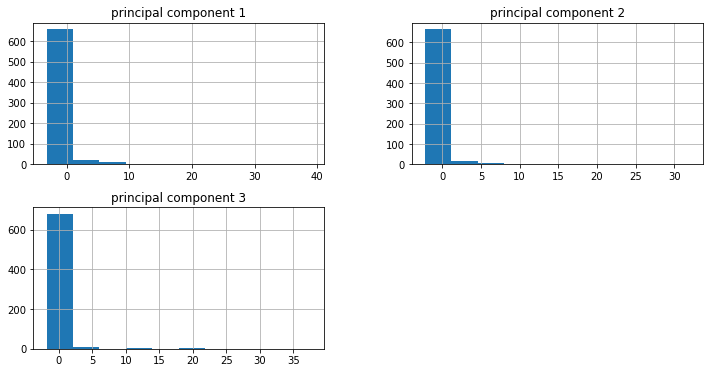

In [239]:
# Plotting the Histogram for most significant PCs
principal_dataset.hist()

In [240]:
# For each PC the most common values are around 0
# In PC1 the least common values range between 1 and 9
# In PC2 the least common values range between 1 and 7
# In PC3 the least common values range between 3 and 23